In [66]:
import pandas as pd
import numpy as np
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
print("Loading datasets...")
orders = pd.read_csv('/content/orders.csv')
order_products_train = pd.read_csv('/content/order_products__train.csv')
products = pd.read_csv('/content/products.csv')

print(f"Orders shape: {orders.shape}")
print(f"Order Products Train shape: {order_products_train.shape}")
print(f"Products shape: {products.shape}")
print("\nFirst few rows of orders:")
print(orders.head())
print("\nFirst few rows of order_products_train:")
print(order_products_train.head())
print("\nFirst few rows of products:")
print(products.head())


Loading datasets...
Orders shape: (3421083, 7)
Order Products Train shape: (1384617, 4)
Products shape: (49688, 4)

First few rows of orders:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  

First few rows of order_products_train:
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246 

In [67]:
# Filter orders where eval_set is 'train'
print("Filtering orders with eval_set = 'train'...")
train_orders = orders[orders['eval_set'] == 'train']

print(f"\nTotal orders: {len(orders)}")
print(f"Training orders (eval_set='train'): {len(train_orders)}")
print(f"\nUnique values in eval_set column:")
print(orders['eval_set'].value_counts())
print(f"\nSample of train orders:")
print(train_orders.head())


Filtering orders with eval_set = 'train'...

Total orders: 3421083
Training orders (eval_set='train'): 131209

Unique values in eval_set column:
eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

Sample of train orders:
    order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
10   1187899        1    train            11          4                  8   
25   1492625        2    train            15          1                 11   
49   2196797        5    train             5          0                 11   
74    525192        7    train            21          2                 11   
78    880375        8    train             4          1                 14   

    days_since_prior_order  
10                    14.0  
25                    30.0  
49                     6.0  
74                     6.0  
78                    10.0  


In [68]:
# Merge train orders with order_products to get product IDs
print("\nMerging train orders with order products...")
train_order_ids = train_orders['order_id'].unique()
train_transactions = order_products_train[order_products_train['order_id'].isin(train_order_ids)]

print(f"Total transactions (product purchases): {len(train_transactions)}")
print(f"Unique orders in transactions: {train_transactions['order_id'].nunique()}")

# Create transactional dataset: each transaction is order_id -> list of product_ids
print("\nCreating transactional dataset...")
transactions = train_transactions.groupby('order_id')['product_id'].apply(list).reset_index()
transactions.columns = ['order_id', 'products']

print(f"\nTransactional dataset created!")
print(f"Number of transactions (baskets): {len(transactions)}")
print(f"\nFirst 10 transactions:")
print(transactions.head(10))

# Display statistics about transaction sizes
transaction_sizes = transactions['products'].apply(len)
print(f"\nTransaction size statistics:")
print(f"Mean items per basket: {transaction_sizes.mean():.2f}")
print(f"Median items per basket: {transaction_sizes.median():.2f}")
print(f"Min items per basket: {transaction_sizes.min()}")
print(f"Max items per basket: {transaction_sizes.max()}")
print(f"Std deviation: {transaction_sizes.std():.2f}")



Merging train orders with order products...
Total transactions (product purchases): 1384617
Unique orders in transactions: 131209

Creating transactional dataset...

Transactional dataset created!
Number of transactions (baskets): 131209

First 10 transactions:
   order_id                                           products
0         1  [49302, 11109, 10246, 49683, 43633, 13176, 472...
1        36  [39612, 19660, 49235, 43086, 46620, 34497, 486...
2        38  [11913, 18159, 4461, 21616, 23622, 32433, 2884...
3        96  [20574, 30391, 40706, 25610, 27966, 24489, 39275]
4        98  [8859, 19731, 43654, 13176, 4357, 37664, 34065...
5       112  [27104, 21174, 41860, 38273, 47209, 5876, 2921...
6       170  [18394, 37766, 13176, 6236, 5077, 8153, 43772,...
7       218                  [1194, 5578, 38159, 10305, 38557]
8       226  [28199, 24852, 29883, 28427, 7754, 39947, 4730...
9       349  [33000, 11361, 27695, 47672, 45633, 38015, 369...

Transaction size statistics:
Mean items per

In [69]:
# Verify the transactional dataset
print("\n=== VERIFICATION ===")
print(f"Total number of transactions: {len(transactions)}")
print(f"\nSample transaction (order_id: {transactions.iloc[0]['order_id']}):")
sample_products = transactions.iloc[0]['products']
print(f"Product IDs in this basket: {sample_products}")
print(f"Number of items: {len(sample_products)}")

# Optional: Show product names for better understanding
if len(sample_products) > 0:
    sample_product_names = products[products['product_id'].isin(sample_products)][['product_id', 'product_name']]
    print(f"\nProduct names:")
    print(sample_product_names)

# Save the transactional dataset for later use
print("\nSaving transactional dataset...")
transactions.to_csv('transactional_dataset.csv', index=False)
print("Saved to 'transactional_dataset.csv'")

print("\n=== PART A - Q1 COMPLETED ===")
print(f"✓ Created transactional dataset with {len(transactions)} transactions")
print(f"✓ Each transaction contains a list of product_ids")



=== VERIFICATION ===
Total number of transactions: 131209

Sample transaction (order_id: 1):
Product IDs in this basket: [49302, 11109, 10246, 49683, 43633, 13176, 47209, 22035]
Number of items: 8

Product names:
       product_id                                   product_name
10245       10246                          Organic Celery Hearts
11108       11109  Organic 4% Milk Fat Whole Milk Cottage Cheese
13175       13176                         Bag of Organic Bananas
22034       22035                    Organic Whole String Cheese
43632       43633           Lightly Smoked Sardines in Olive Oil
47208       47209                           Organic Hass Avocado
49301       49302                               Bulgarian Yogurt
49682       49683                                 Cucumber Kirby

Saving transactional dataset...
Saved to 'transactional_dataset.csv'

=== PART A - Q1 COMPLETED ===
✓ Created transactional dataset with 131209 transactions
✓ Each transaction contains a list of produ

In [70]:
from sklearn.model_selection import train_test_split

print("=== PART A - Q2: SPLITTING DATA ===\n")

# Set random seed for reproducibility
random_seed = 42

# Split the transactional dataset: 80% train, 20% test
print(f"Original transactional dataset size: {len(transactions)} transactions")
print(f"Splitting into 80% train and 20% test...\n")

train_data, test_data = train_test_split(
    transactions,
    test_size=0.2,
    random_state=random_seed
)

print(f"✓ Training set size: {len(train_data)} transactions ({len(train_data)/len(transactions)*100:.1f}%)")
print(f"✓ Test set size: {len(test_data)} transactions ({len(test_data)/len(transactions)*100:.1f}%)")

# Reset indices for both datasets
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

print("\nFirst 5 transactions in training set:")
print(train_data.head())
print("\nFirst 5 transactions in test set:")
print(test_data.head())


=== PART A - Q2: SPLITTING DATA ===

Original transactional dataset size: 131209 transactions
Splitting into 80% train and 20% test...

✓ Training set size: 104967 transactions (80.0%)
✓ Test set size: 26242 transactions (20.0%)

First 5 transactions in training set:
   order_id                                           products
0    752925                [12576, 22281, 14467, 13292, 21344]
1   2314811  [5385, 11009, 17951, 46515, 20604, 196, 12620,...
2   1723799  [1999, 26209, 19894, 34551, 34358, 4605, 44359...
3    759590  [42309, 16289, 31231, 39190, 25837, 34169, 367...
4    673584  [24838, 20114, 44632, 46654, 8728, 7120, 46676...

First 5 transactions in test set:
   order_id                                           products
0   3007878  [2078, 18531, 27845, 4799, 23029, 23565, 19895...
1   1727889  [19348, 42058, 9389, 21137, 5450, 927, 11351, ...
2   2829462  [41349, 36835, 13339, 47546, 23586, 4853, 1177...
3   3261021  [24852, 39180, 47766, 25272, 23815, 8138, 4129...
4   

In [71]:
print("\n=== VERIFICATION OF SPLIT ===\n")

# Check if split is correct
total = len(train_data) + len(test_data)
print(f"Total transactions: {total}")
print(f"Original transactions: {len(transactions)}")
print(f"Match: {total == len(transactions)}\n")

# Analyze transaction sizes in both sets
train_sizes = train_data['products'].apply(len)
test_sizes = test_data['products'].apply(len)

print("Transaction size statistics:")
print(f"\nTraining Set:")
print(f"  Mean items per basket: {train_sizes.mean():.2f}")
print(f"  Median items per basket: {train_sizes.median():.2f}")
print(f"  Min items: {train_sizes.min()}, Max items: {train_sizes.max()}")
print(f"  Std deviation: {train_sizes.std():.2f}")

print(f"\nTest Set:")
print(f"  Mean items per basket: {test_sizes.mean():.2f}")
print(f"  Median items per basket: {test_sizes.median():.2f}")
print(f"  Min items: {test_sizes.min()}, Max items: {test_sizes.max()}")
print(f"  Std deviation: {test_sizes.std():.2f}")

print("\n✓ Both sets have similar statistics, indicating a good random split")



=== VERIFICATION OF SPLIT ===

Total transactions: 131209
Original transactions: 131209
Match: True

Transaction size statistics:

Training Set:
  Mean items per basket: 10.55
  Median items per basket: 9.00
  Min items: 1, Max items: 80
  Std deviation: 7.92

Test Set:
  Mean items per basket: 10.56
  Median items per basket: 9.00
  Min items: 1, Max items: 72
  Std deviation: 7.99

✓ Both sets have similar statistics, indicating a good random split


In [72]:
print("\n=== SAVING SPLIT DATASETS ===\n")

# Save train and test sets to CSV files
train_data.to_csv('/content/train_transactions.csv', index=False)
test_data.to_csv('/content/test_transactions.csv', index=False)

print("✓ Training set saved to: '/content/train_transactions.csv'")
print("✓ Test set saved to: '/content/test_transactions.csv'")

# Display sample transactions with actual product names
print("\n=== SAMPLE TRANSACTION FROM TRAINING SET ===")
sample_train = train_data.iloc[0]
sample_train_products = sample_train['products']
print(f"Order ID: {sample_train['order_id']}")
print(f"Number of products: {len(sample_train_products)}")
print(f"Product IDs: {sample_train_products[:10]}...")  # Show first 10
sample_train_names = products[products['product_id'].isin(sample_train_products[:10])][['product_id', 'product_name']]
print("\nProduct names (first 10):")
print(sample_train_names.to_string(index=False))

print("\n=== PART A - Q2 COMPLETED ===")
print(f"✓ Split {len(transactions)} transactions into:")
print(f"  - Training: {len(train_data)} transactions (80%)")
print(f"  - Testing: {len(test_data)} transactions (20%)")
print("✓ Both datasets saved and ready for association rule mining!")



=== SAVING SPLIT DATASETS ===

✓ Training set saved to: '/content/train_transactions.csv'
✓ Test set saved to: '/content/test_transactions.csv'

=== SAMPLE TRANSACTION FROM TRAINING SET ===
Order ID: 752925
Number of products: 5
Product IDs: [12576, 22281, 14467, 13292, 21344]...

Product names (first 10):
 product_id                                                                                  product_name
      12576                                                                   Kiwi Sandia Sparkling Water
      13292 Juice Beverage, Cold Pressed, Kale Apple Ginger Romaine Spinach Cucumber Celery Parsley Lemon
      14467                                                                                Sweet Baguette
      21344                                                                     Multigrain Sandwich Bread
      22281                                                                           Chicken Noodle Soup

=== PART A - Q2 COMPLETED ===
✓ Split 131209 transacti

In [76]:
print("=== PART B: FP-GROWTH IMPLEMENTATION FROM SCRATCH ===\n")

import time
from collections import defaultdict
from itertools import combinations

class FPNode:
    """
    A node in the FP-tree.
    """
    def __init__(self, item, count, parent):
        self.item = item          # Item name
        self.count = count        # Support count
        self.parent = parent      # Parent node
        self.children = {}        # Dictionary of children: {item: FPNode}
        self.node_link = None     # Link to next node with same item

    def increment(self, count):
        """Increment the count of this node."""
        self.count += count

    def display(self, ind=1):
        """Display tree structure (for debugging)."""
        print('  ' * ind, self.item, ' ', self.count)
        for child in self.children.values():
            child.display(ind + 1)

class FPTree:
    """
    FP-tree structure for frequent pattern mining.
    """
    def __init__(self, transactions, min_support_count):
        self.min_support_count = min_support_count
        self.header_table = {}  # {item: [support_count, node_link]}
        self.root = FPNode('Null', 1, None)

        # Build the tree
        self._build_tree(transactions)

    def _build_tree(self, transactions):
        """Build FP-tree from transactions."""
        # First scan: count item frequencies
        item_counts = defaultdict(int)
        for transaction in transactions:
            for item in transaction:
                item_counts[item] += 1

        # Filter items by min_support
        frequent_items = {item: count for item, count in item_counts.items()
                         if count >= self.min_support_count}

        if len(frequent_items) == 0:
            return

        # Initialize header table
        for item in frequent_items:
            self.header_table[item] = [frequent_items[item], None]

        # Second scan: build FP-tree
        for transaction in transactions:
            # Filter and sort transaction by frequency (descending)
            filtered_trans = [item for item in transaction if item in frequent_items]
            filtered_trans.sort(key=lambda x: frequent_items[x], reverse=True)

            if len(filtered_trans) > 0:
                self._insert_transaction(filtered_trans, self.root, 1)

    def _insert_transaction(self, items, node, count):
        """Insert a transaction into the FP-tree."""
        if len(items) == 0:
            return

        first_item = items[0]

        # Check if child exists
        if first_item in node.children:
            node.children[first_item].increment(count)
        else:
            # Create new child node
            new_node = FPNode(first_item, count, node)
            node.children[first_item] = new_node

            # Update header table node links
            if self.header_table[first_item][1] is None:
                self.header_table[first_item][1] = new_node
            else:
                # Add to end of node chain
                current = self.header_table[first_item][1]
                while current.node_link is not None:
                    current = current.node_link
                current.node_link = new_node

        # Recursively insert remaining items
        if len(items) > 1:
            self._insert_transaction(items[1:], node.children[first_item], count)

print("✓ FP-Tree classes defined:")
print("  - FPNode: Individual tree node")
print("  - FPTree: Complete FP-tree structure")


=== PART B: FP-GROWTH IMPLEMENTATION FROM SCRATCH ===

✓ FP-Tree classes defined:
  - FPNode: Individual tree node
  - FPTree: Complete FP-tree structure


In [77]:
def get_prefix_paths(item, header_table):
    """
    Get all prefix paths for a given item.

    Args:
        item: The item to find prefix paths for
        header_table: The header table from FP-tree

    Returns:
        List of prefix paths (each path is a list of items with count)
    """
    prefix_paths = []
    node = header_table[item][1]  # Get first node with this item

    while node is not None:
        path = []
        parent = node.parent

        # Traverse up to root
        while parent.item != 'Null':
            path.append(parent.item)
            parent = parent.parent

        if len(path) > 0:
            prefix_paths.append((path[::-1], node.count))  # Reverse path

        node = node.node_link  # Next node with same item

    return prefix_paths

def mine_fp_tree(header_table, min_support_count, prefix, frequent_itemsets):
    """
    Recursively mine FP-tree to find frequent patterns.

    Args:
        header_table: Header table from FP-tree
        min_support_count: Minimum support count threshold
        prefix: Current prefix pattern
        frequent_itemsets: Dictionary to store results
    """
    # Sort items by frequency (ascending for bottom-up mining)
    items = sorted(header_table.items(), key=lambda x: x[1][0])

    for item, (count, node) in items:
        # Create new frequent itemset
        new_frequent = prefix.copy()
        new_frequent.add(item)

        # Store with support count
        support = header_table[item][0]
        frequent_itemsets[frozenset(new_frequent)] = support

        # Get prefix paths for this item
        prefix_paths = get_prefix_paths(item, header_table)

        if len(prefix_paths) > 0:
            # Build conditional pattern base
            conditional_transactions = []
            for path, path_count in prefix_paths:
                for _ in range(path_count):
                    conditional_transactions.append(path)

            # Build conditional FP-tree
            conditional_tree = FPTree(conditional_transactions, min_support_count)

            # Mine conditional tree recursively
            if len(conditional_tree.header_table) > 0:
                mine_fp_tree(conditional_tree.header_table, min_support_count,
                           new_frequent, frequent_itemsets)

def fp_growth(transactions, min_support):
    """
    FP-Growth algorithm implementation from scratch.

    Args:
        transactions: List of lists (transactions)
        min_support: Minimum support threshold (fraction)

    Returns:
        Dictionary {itemset: support} for all frequent itemsets
    """
    print(f"\n=== RUNNING FP-GROWTH ALGORITHM ===")
    print(f"Minimum support: {min_support} ({min_support * 100}%)")

    n_transactions = len(transactions)
    min_support_count = int(min_support * n_transactions)
    print(f"Total transactions: {n_transactions}")
    print(f"Minimum support count: {min_support_count}\n")

    # Build FP-tree
    print("Step 1: Building FP-tree...")
    start_build = time.time()
    fp_tree = FPTree(transactions, min_support_count)
    print(f"  ✓ FP-tree built in {time.time() - start_build:.2f}s")
    print(f"  ✓ Frequent 1-itemsets: {len(fp_tree.header_table)}")

    # Mine FP-tree
    print("\nStep 2: Mining frequent patterns...")
    start_mine = time.time()
    frequent_itemsets = {}

    # Add 1-itemsets
    for item, (count, node) in fp_tree.header_table.items():
        frequent_itemsets[frozenset([item])] = count

    # Mine recursively
    mine_fp_tree(fp_tree.header_table, min_support_count, set(), frequent_itemsets)
    print(f"  ✓ Mining completed in {time.time() - start_mine:.2f}s")
    print(f"  ✓ Total frequent itemsets: {len(frequent_itemsets)}")

    # Convert to support fractions
    frequent_with_support = {itemset: count / n_transactions
                            for itemset, count in frequent_itemsets.items()}

    return frequent_with_support

print("\n✓ FP-Growth mining functions defined:")
print("  - get_prefix_paths()")
print("  - mine_fp_tree()")
print("  - fp_growth()")



✓ FP-Growth mining functions defined:
  - get_prefix_paths()
  - mine_fp_tree()
  - fp_growth()


In [78]:
print("\n=== TESTING FP-GROWTH ===\n")

# Prepare data
transactions_list_str = [[str(item) for item in transaction]
                        for transaction in train_data['products'].tolist()]

test_min_support = 0.005  # 0.5%

print(f"Testing FP-Growth with min_support = {test_min_support}")
print("Expected time: 2-5 minutes (MUCH faster than Apriori!)\n")

start_time = time.time()
frequent_itemsets_fp = fp_growth(transactions_list_str, test_min_support)
end_time = time.time()

print(f"\n⏱ TOTAL Execution time: {end_time - start_time:.2f} seconds ({(end_time - start_time)/60:.2f} minutes)")

# Display results
print("\n=== RESULTS ===")
sorted_itemsets = sorted(frequent_itemsets_fp.items(), key=lambda x: x[1], reverse=True)

print("\nTop 20 frequent itemsets by support:")
for i, (itemset, support) in enumerate(sorted_itemsets[:20], 1):
    items = list(itemset)
    print(f"{i}. {items} | Support: {support:.4f} ({support*100:.2f}%)")

# Itemset size distribution
itemset_sizes = {}
for itemset in frequent_itemsets_fp.keys():
    size = len(itemset)
    itemset_sizes[size] = itemset_sizes.get(size, 0) + 1

print("\n=== ITEMSET SIZE DISTRIBUTION ===")
for size in sorted(itemset_sizes.keys()):
    print(f"  {size}-itemsets: {itemset_sizes[size]}")

print("\n=== FP-GROWTH COMPLETED ===")



=== TESTING FP-GROWTH ===

Testing FP-Growth with min_support = 0.005
Expected time: 2-5 minutes (MUCH faster than Apriori!)


=== RUNNING FP-GROWTH ALGORITHM ===
Minimum support: 0.005 (0.5%)
Total transactions: 104967
Minimum support count: 524

Step 1: Building FP-tree...
  ✓ FP-tree built in 22.21s
  ✓ Frequent 1-itemsets: 259

Step 2: Mining frequent patterns...
  ✓ Mining completed in 0.86s
  ✓ Total frequent itemsets: 370

⏱ TOTAL Execution time: 23.07 seconds (0.38 minutes)

=== RESULTS ===

Top 20 frequent itemsets by support:
1. ['24852'] | Support: 0.1424 (14.24%)
2. ['13176'] | Support: 0.1185 (11.85%)
3. ['21137'] | Support: 0.0837 (8.37%)
4. ['21903'] | Support: 0.0745 (7.45%)
5. ['47626'] | Support: 0.0619 (6.19%)
6. ['47766'] | Support: 0.0573 (5.73%)
7. ['47209'] | Support: 0.0558 (5.58%)
8. ['16797'] | Support: 0.0491 (4.91%)
9. ['26209'] | Support: 0.0461 (4.61%)
10. ['27966'] | Support: 0.0424 (4.24%)
11. ['27845'] | Support: 0.0379 (3.79%)
12. ['39275'] | Support:

In [132]:
print("=== GENERATING ASSOCIATION RULES ===\n")

def generate_association_rules(frequent_itemsets, min_confidence):
    """
    Generate association rules from frequent itemsets.
    Rules format: {A} → Y where A is single item antecedent.

    Args:
        frequent_itemsets: Dictionary {frozenset: support}
        min_confidence: Minimum confidence threshold

    Returns:
        List of rules as dictionaries
    """
    rules = []

    # Only consider itemsets with 2+ items for rules
    itemsets_2plus = {itemset: support for itemset, support in frequent_itemsets.items()
                      if len(itemset) >= 2}

    print(f"Generating rules from {len(itemsets_2plus)} itemsets (size >= 2)...")

    for itemset, itemset_support in itemsets_2plus.items():
        itemset_list = list(itemset)

        # For each item in the itemset, try it as antecedent
        for item in itemset_list:
            # Antecedent: single item
            antecedent = frozenset([item])
            # Consequent: remaining items
            consequent = itemset - antecedent

            # Get support of antecedent
            if antecedent in frequent_itemsets:
                antecedent_support = frequent_itemsets[antecedent]

                # Calculate confidence: P(consequent|antecedent) = support(itemset) / support(antecedent)
                confidence = itemset_support / antecedent_support

                # Only keep if confidence >= threshold
                if confidence >= min_confidence:
                    # Calculate lift: confidence / support(consequent)
                    # First get consequent support
                    consequent_support = frequent_itemsets.get(consequent, 0)
                    if consequent_support > 0:
                        lift = confidence / consequent_support
                    else:
                        lift = 0

                    rules.append({
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': itemset_support,
                        'confidence': confidence,
                        'lift': lift,
                        'antecedent_support': antecedent_support,
                        'consequent_support': consequent_support
                    })

    print(f"✓ Generated {len(rules)} rules with min_confidence = {min_confidence}\n")
    return rules



=== GENERATING ASSOCIATION RULES ===



In [133]:
print("=== PART B - Q2: THRESHOLD EXPERIMENTATION ===\n")

import matplotlib.pyplot as plt
import numpy as np

# Define range of min_support values to test (0.1% to 1%)
min_support_values = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

print("Testing different min_support values...")
print("Range: 0.001 (0.1%) to 0.01 (1.0%)\n")

# Store results
support_results = []

for min_sup in min_support_values:
    print(f"Testing min_support = {min_sup} ({min_sup*100}%)...", end=" ")

    start_time = time.time()

    # Run FP-Growth
    freq_itemsets = fp_growth(transactions_list_str, min_sup)

    # Generate rules with fixed min_confidence for now
    fixed_min_conf = 0.05  # 5%
    rules_temp = generate_association_rules(freq_itemsets, fixed_min_conf)

    exec_time = time.time() - start_time

    # Count itemsets by ALL sizes (not just 1, 2, 3)
    itemset_counts = {}
    max_size = 0

    for itemset in freq_itemsets.keys():
        size = len(itemset)
        max_size = max(max_size, size)
        itemset_counts[size] = itemset_counts.get(size, 0) + 1

    support_results.append({
        'min_support': min_sup,
        'total_itemsets': len(freq_itemsets),
        'total_rules': len(rules_temp),
        'execution_time': exec_time,
        'itemset_counts': itemset_counts,
        'max_size': max_size
    })

    print(f"Itemsets: {len(freq_itemsets)}, Rules: {len(rules_temp)}, Max size: {max_size}, Time: {exec_time:.2f}s")

print("\n✓ Min_support experimentation completed!")

# Find overall max size across all experiments
max_size_overall = max(result['max_size'] for result in support_results)

# Display comprehensive summary table
print("\n=== MIN_SUPPORT EXPERIMENT RESULTS ===")

# Build dynamic header based on actual max itemset size found
header = f"{'Support':<10} {'Itemsets':<10} {'Rules':<8} "
for size in range(1, max_size_overall + 1):
    header += f"{size}-items  "
header += f"{'Time(s)':<8}"
print(header)
print("-" * len(header))

for result in support_results:
    row = f"{result['min_support']:<10.3f} {result['total_itemsets']:<10} {result['total_rules']:<8} "

    for size in range(1, max_size_overall + 1):
        count = result['itemset_counts'].get(size, 0)
        row += f"{count:<9}"

    row += f"{result['execution_time']:<8.2f}"
    print(row)


=== PART B - Q2: THRESHOLD EXPERIMENTATION ===

Testing different min_support values...
Range: 0.001 (0.1%) to 0.01 (1.0%)

Testing min_support = 0.001 (0.1%)... 
=== RUNNING FP-GROWTH ALGORITHM ===
Minimum support: 0.001 (0.1%)
Total transactions: 104967
Minimum support count: 104

Step 1: Building FP-tree...
  ✓ FP-tree built in 48.47s
  ✓ Frequent 1-itemsets: 1895

Step 2: Mining frequent patterns...
  ✓ Mining completed in 5.03s
  ✓ Total frequent itemsets: 4572
Generating rules from 2677 itemsets (size >= 2)...
✓ Generated 2987 rules with min_confidence = 0.05

Itemsets: 4572, Rules: 2987, Max size: 4, Time: 53.52s
Testing min_support = 0.002 (0.2%)... 
=== RUNNING FP-GROWTH ALGORITHM ===
Minimum support: 0.002 (0.2%)
Total transactions: 104967
Minimum support count: 209

Step 1: Building FP-tree...
  ✓ FP-tree built in 38.31s
  ✓ Frequent 1-itemsets: 863

Step 2: Mining frequent patterns...
  ✓ Mining completed in 2.63s
  ✓ Total frequent itemsets: 1596
Generating rules from 733 


=== PLOTTING MIN_SUPPORT RESULTS ===

✓ Plot saved as 'min_support_analysis.png'


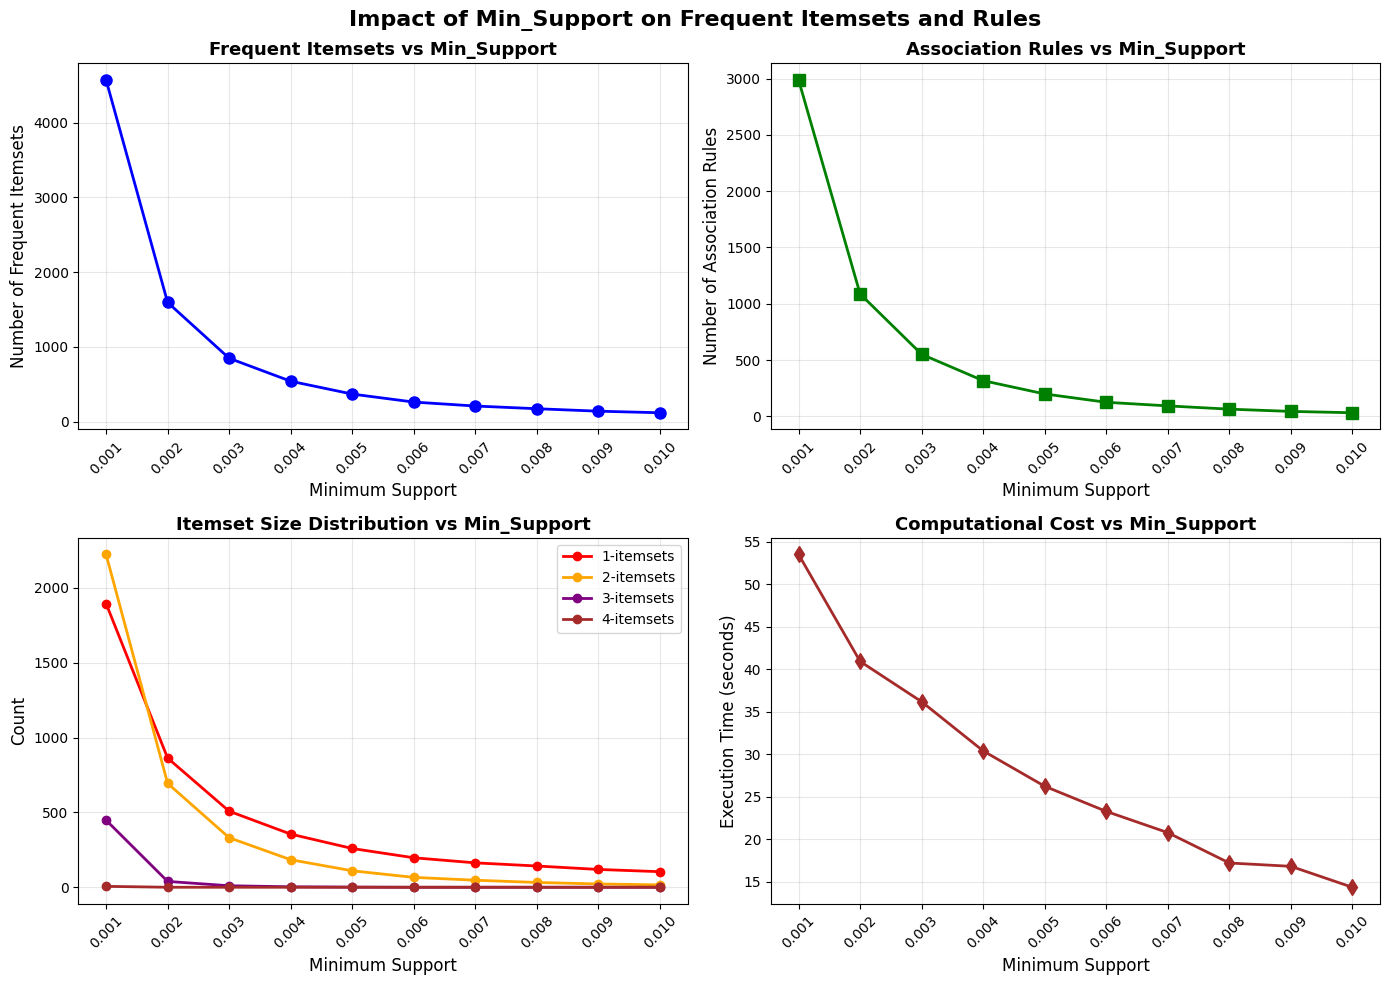


=== KEY OBSERVATIONS (for your report) ===
1. As min_support decreases, more frequent itemsets are found (less restrictive)
2. Number of rules increases with lower support (more product combinations)
3. Lower support finds more diverse itemsets but increases computation time
4. There's a trade-off between coverage and computational efficiency


In [134]:
print("\n=== PLOTTING MIN_SUPPORT RESULTS ===\n")

# Extract data for plotting
support_vals = [r['min_support'] for r in support_results]
total_itemsets = [r['total_itemsets'] for r in support_results]
total_rules = [r['total_rules'] for r in support_results]
exec_times = [r['execution_time'] for r in support_results]

# Get itemset counts by size for plotting
itemset_data_by_size = {}
for size in range(1, max_size_overall + 1):
    itemset_data_by_size[size] = [r['itemset_counts'].get(size, 0) for r in support_results]

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Impact of Min_Support on Frequent Itemsets and Rules', fontsize=16, fontweight='bold')

# Plot 1: Total Frequent Itemsets vs Min_Support
axes[0, 0].plot(support_vals, total_itemsets, marker='o', linewidth=2, markersize=8, color='blue')
axes[0, 0].set_xlabel('Minimum Support', fontsize=12)
axes[0, 0].set_ylabel('Number of Frequent Itemsets', fontsize=12)
axes[0, 0].set_title('Frequent Itemsets vs Min_Support', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(support_vals)
axes[0, 0].set_xticklabels([f'{s:.3f}' for s in support_vals], rotation=45)

# Plot 2: Total Rules vs Min_Support
axes[0, 1].plot(support_vals, total_rules, marker='s', linewidth=2, markersize=8, color='green')
axes[0, 1].set_xlabel('Minimum Support', fontsize=12)
axes[0, 1].set_ylabel('Number of Association Rules', fontsize=12)
axes[0, 1].set_title('Association Rules vs Min_Support', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(support_vals)
axes[0, 1].set_xticklabels([f'{s:.3f}' for s in support_vals], rotation=45)

# Plot 3: Itemset Size Distribution (show all sizes found)
colors = ['red', 'orange', 'purple', 'brown', 'pink', 'gray']
for size in range(1, min(max_size_overall + 1, 7)):  # Show up to 6 sizes
    if size in itemset_data_by_size:
        axes[1, 0].plot(support_vals, itemset_data_by_size[size],
                       marker='o', linewidth=2,
                       label=f'{size}-itemsets',
                       color=colors[size-1] if size <= len(colors) else None)

axes[1, 0].set_xlabel('Minimum Support', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_title('Itemset Size Distribution vs Min_Support', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(support_vals)
axes[1, 0].set_xticklabels([f'{s:.3f}' for s in support_vals], rotation=45)

# Plot 4: Execution Time vs Min_Support
axes[1, 1].plot(support_vals, exec_times, marker='d', linewidth=2, markersize=8, color='brown')
axes[1, 1].set_xlabel('Minimum Support', fontsize=12)
axes[1, 1].set_ylabel('Execution Time (seconds)', fontsize=12)
axes[1, 1].set_title('Computational Cost vs Min_Support', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(support_vals)
axes[1, 1].set_xticklabels([f'{s:.3f}' for s in support_vals], rotation=45)

plt.tight_layout()
plt.savefig('/content/min_support_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved as 'min_support_analysis.png'")
plt.show()

print("\n=== KEY OBSERVATIONS (for your report) ===")
print("1. As min_support decreases, more frequent itemsets are found (less restrictive)")
print("2. Number of rules increases with lower support (more product combinations)")
print("3. Lower support finds more diverse itemsets but increases computation time")
print("4. There's a trade-off between coverage and computational efficiency")


In [135]:
print("\n=== EXPERIMENTING WITH MIN_CONFIDENCE ===\n")

# Fix min_support at a middle value for confidence testing
fixed_min_support = 0.0015  # 0.5%

# Min_confidence range: 0.01 (1%) to 0.1 (10%)
min_confidence_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

print(f"Using fixed min_support = {fixed_min_support}")
print("Testing different min_confidence values...")
print("Range: 0.01 (1%) to 0.1 (10%)\n")

# Generate frequent itemsets once
print("Generating frequent itemsets...")
freq_itemsets_fixed = fp_growth(transactions_list_str, fixed_min_support)
print(f"✓ Found {len(freq_itemsets_fixed)} frequent itemsets\n")

confidence_results = []

for min_conf in min_confidence_values:
    print(f"Testing min_confidence = {min_conf} ({min_conf*100}%)...", end=" ")

    # Generate rules with this confidence
    rules_conf = generate_association_rules(freq_itemsets_fixed, min_conf)

    # Calculate average metrics
    if len(rules_conf) > 0:
        avg_confidence = sum(r['confidence'] for r in rules_conf) / len(rules_conf)
        avg_lift = sum(r['lift'] for r in rules_conf) / len(rules_conf)
        avg_support = sum(r['support'] for r in rules_conf) / len(rules_conf)
    else:
        avg_confidence = 0
        avg_lift = 0
        avg_support = 0

    confidence_results.append({
        'min_confidence': min_conf,
        'total_rules': len(rules_conf),
        'avg_confidence': avg_confidence,
        'avg_lift': avg_lift,
        'avg_support': avg_support
    })

    print(f"Rules: {len(rules_conf)}, Avg Conf: {avg_confidence:.4f}")

print("\n✓ Min_confidence experimentation completed!")

# Display summary
print("\n=== MIN_CONFIDENCE EXPERIMENT RESULTS ===")
print(f"{'Confidence':<12} {'Rules':<10} {'Avg Conf':<12} {'Avg Lift':<12} {'Avg Support':<12}")
print("-" * 60)
for result in confidence_results:
    print(f"{result['min_confidence']:<12.2f} {result['total_rules']:<10} "
          f"{result['avg_confidence']:<12.4f} {result['avg_lift']:<12.4f} "
          f"{result['avg_support']:<12.4f}")



=== EXPERIMENTING WITH MIN_CONFIDENCE ===

Using fixed min_support = 0.0015
Testing different min_confidence values...
Range: 0.01 (1%) to 0.1 (10%)

Generating frequent itemsets...

=== RUNNING FP-GROWTH ALGORITHM ===
Minimum support: 0.0015 (0.15%)
Total transactions: 104967
Minimum support count: 157

Step 1: Building FP-tree...
  ✓ FP-tree built in 44.13s
  ✓ Frequent 1-itemsets: 1199

Step 2: Mining frequent patterns...
  ✓ Mining completed in 2.72s
  ✓ Total frequent itemsets: 2435
✓ Found 2435 frequent itemsets

Testing min_confidence = 0.01 (1.0%)... Generating rules from 1236 itemsets (size >= 2)...
✓ Generated 2603 rules with min_confidence = 0.01

Rules: 2603, Avg Conf: 0.0934
Testing min_confidence = 0.02 (2.0%)... Generating rules from 1236 itemsets (size >= 2)...
✓ Generated 2351 rules with min_confidence = 0.02

Rules: 2351, Avg Conf: 0.1018
Testing min_confidence = 0.03 (3.0%)... Generating rules from 1236 itemsets (size >= 2)...
✓ Generated 2082 rules with min_confide


=== PLOTTING MIN_CONFIDENCE RESULTS ===

✓ Plot saved as 'min_confidence_analysis.png'


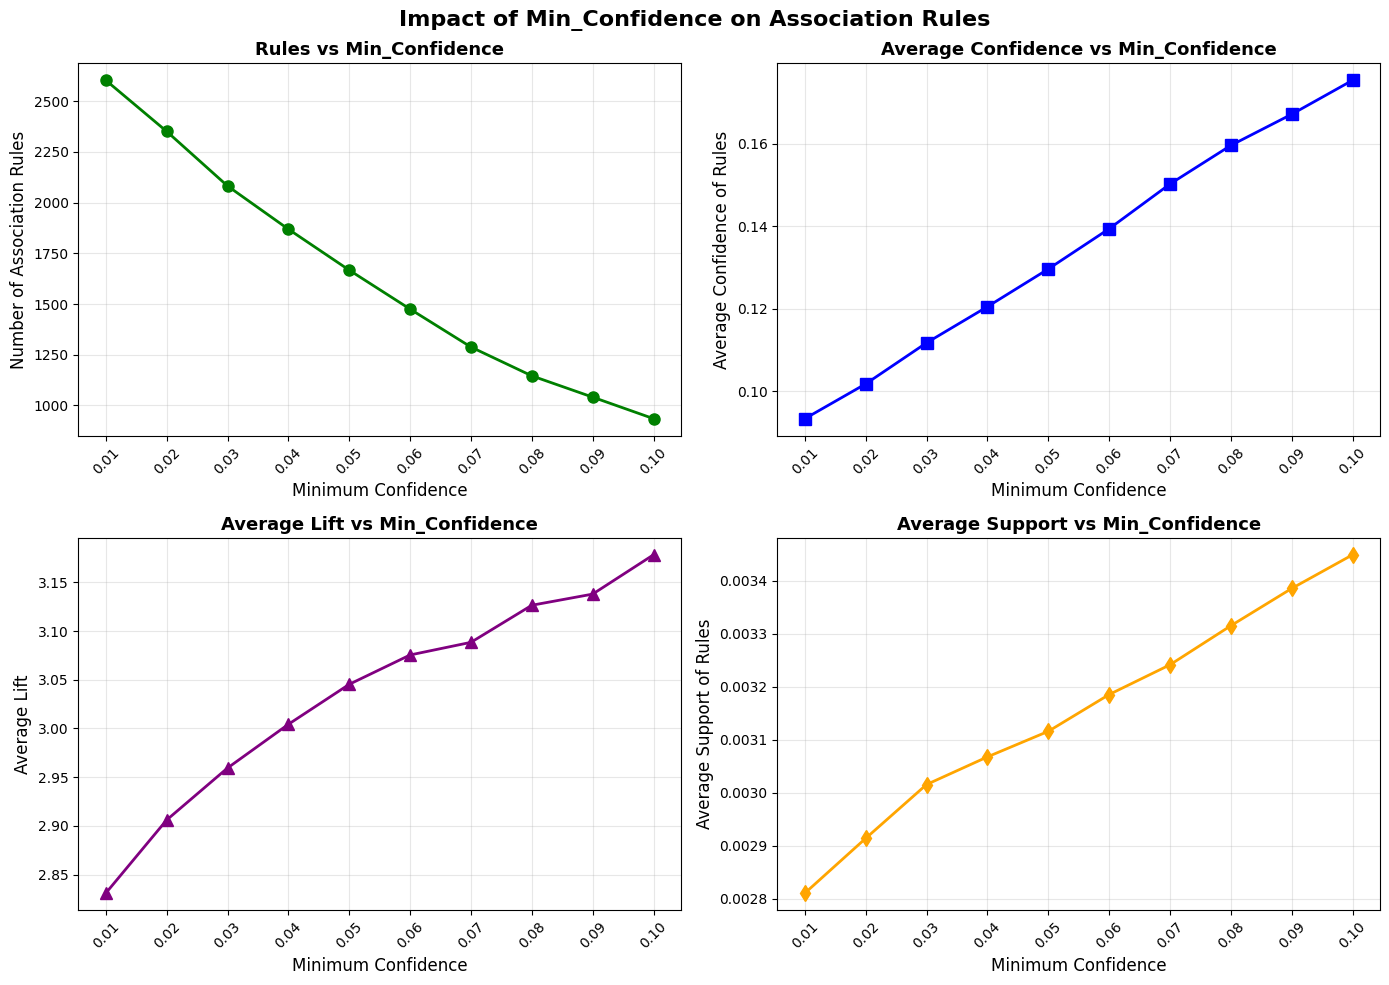


=== KEY OBSERVATIONS (for your report) ===
1. As min_confidence increases, fewer rules pass the threshold (more restrictive)
2. Higher confidence threshold yields rules with higher average confidence
3. Average lift remains relatively stable across confidence thresholds
4. Higher confidence filters out weak associations, keeping only strong patterns


In [136]:
print("\n=== PLOTTING MIN_CONFIDENCE RESULTS ===\n")

# Extract data
conf_vals = [r['min_confidence'] for r in confidence_results]
total_rules_conf = [r['total_rules'] for r in confidence_results]
avg_confidence_vals = [r['avg_confidence'] for r in confidence_results]
avg_lift_vals = [r['avg_lift'] for r in confidence_results]
avg_support_vals = [r['avg_support'] for r in confidence_results]

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Impact of Min_Confidence on Association Rules', fontsize=16, fontweight='bold')

# Plot 1: Number of Rules vs Min_Confidence
axes[0, 0].plot(conf_vals, total_rules_conf, marker='o', linewidth=2, markersize=8, color='green')
axes[0, 0].set_xlabel('Minimum Confidence', fontsize=12)
axes[0, 0].set_ylabel('Number of Association Rules', fontsize=12)
axes[0, 0].set_title('Rules vs Min_Confidence', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(conf_vals)
axes[0, 0].set_xticklabels([f'{c:.2f}' for c in conf_vals], rotation=45)

# Plot 2: Average Confidence vs Min_Confidence
axes[0, 1].plot(conf_vals, avg_confidence_vals, marker='s', linewidth=2, markersize=8, color='blue')
axes[0, 1].set_xlabel('Minimum Confidence', fontsize=12)
axes[0, 1].set_ylabel('Average Confidence of Rules', fontsize=12)
axes[0, 1].set_title('Average Confidence vs Min_Confidence', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(conf_vals)
axes[0, 1].set_xticklabels([f'{c:.2f}' for c in conf_vals], rotation=45)

# Plot 3: Average Lift vs Min_Confidence
axes[1, 0].plot(conf_vals, avg_lift_vals, marker='^', linewidth=2, markersize=8, color='purple')
axes[1, 0].set_xlabel('Minimum Confidence', fontsize=12)
axes[1, 0].set_ylabel('Average Lift', fontsize=12)
axes[1, 0].set_title('Average Lift vs Min_Confidence', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(conf_vals)
axes[1, 0].set_xticklabels([f'{c:.2f}' for c in conf_vals], rotation=45)

# Plot 4: Average Support vs Min_Confidence
axes[1, 1].plot(conf_vals, avg_support_vals, marker='d', linewidth=2, markersize=8, color='orange')
axes[1, 1].set_xlabel('Minimum Confidence', fontsize=12)
axes[1, 1].set_ylabel('Average Support of Rules', fontsize=12)
axes[1, 1].set_title('Average Support vs Min_Confidence', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(conf_vals)
axes[1, 1].set_xticklabels([f'{c:.2f}' for c in conf_vals], rotation=45)

plt.tight_layout()
plt.savefig('/content/min_confidence_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved as 'min_confidence_analysis.png'")
plt.show()

print("\n=== KEY OBSERVATIONS (for your report) ===")
print("1. As min_confidence increases, fewer rules pass the threshold (more restrictive)")
print("2. Higher confidence threshold yields rules with higher average confidence")
print("3. Average lift remains relatively stable across confidence thresholds")
print("4. Higher confidence filters out weak associations, keeping only strong patterns")


In [148]:
print("\n" + "="*80)
print("=== PART B - Q1: MINE FOR RULES (25 marks) ===")
print("="*80 + "\n")

# Select optimal thresholds
optimal_min_support = 0.0015  # 0.15%
optimal_min_confidence = 0.075  # 5%

print("Mining association rules using OPTIMAL thresholds:")
print(f"  - min_support = {optimal_min_support}")
print(f"  - min_confidence = {optimal_min_confidence}\n")

# Step 1: Run FP-Growth with optimal support
print("Step 1: Running FP-Growth algorithm...")
print("-" * 80)
start_time = time.time()
frequent_itemsets = fp_growth(transactions_list_str, optimal_min_support)
end_time = time.time()

print(f"\n✓ FP-Growth completed in {end_time - start_time:.2f} seconds")
print(f"✓ Found {len(frequent_itemsets)} frequent itemsets\n")

# Analyze itemset size distribution
itemset_sizes = {}
for itemset in frequent_itemsets.keys():
    size = len(itemset)
    itemset_sizes[size] = itemset_sizes.get(size, 0) + 1

print("Itemset size distribution:")
print("-" * 40)
for size in sorted(itemset_sizes.keys()):
    print(f"  {size}-itemsets: {itemset_sizes[size]}")
print()

# Step 2: Generate association rules
print("Step 2: Generating association rules with format {A} → Y...")
print("-" * 80)
rules = generate_association_rules(frequent_itemsets, optimal_min_confidence)

print(f"\n✓ Generated {len(rules)} rules with format {{A}} → Y")
print(f"  (Single item antecedent → one or more consequent items)\n")

# Calculate rule statistics
if len(rules) > 0:
    avg_conf = sum(r['confidence'] for r in rules) / len(rules)
    avg_lift = sum(r['lift'] for r in rules) / len(rules)
    avg_supp = sum(r['support'] for r in rules) / len(rules)

    print("Rule quality metrics:")
    print(f"  Average confidence: {avg_conf:.4f} ({avg_conf*100:.2f}%)")
    print(f"  Average lift: {avg_lift:.4f}")
    print(f"  Average support: {avg_supp:.4f} ({avg_supp*100:.2f}%)")
    print()

# Analyze consequent sizes in rules
consequent_sizes = {}
for rule in rules:
    size = len(rule['consequent'])
    consequent_sizes[size] = consequent_sizes.get(size, 0) + 1

print("Consequent size distribution in rules:")
print("-" * 40)
for size in sorted(consequent_sizes.keys()):
    print(f"  Rules with {size} item(s) in consequent: {consequent_sizes[size]}")
print()

# Display top rules by CONFIDENCE
print("="*80)
print("TOP 15 RULES BY CONFIDENCE:")
print("="*80)
rules_by_conf = sorted(rules, key=lambda x: x['confidence'], reverse=True)

for i, rule in enumerate(rules_by_conf[:15], 1):
    ant = list(rule['antecedent'])[0]
    cons = list(rule['consequent'])

    # Get product names
    ant_name = products[products['product_id'] == int(ant)]['product_name'].values
    ant_name = ant_name[0] if len(ant_name) > 0 else f"Product {ant}"

    cons_names = []
    for c in cons:
        name = products[products['product_id'] == int(c)]['product_name'].values
        cons_names.append(name[0] if len(name) > 0 else f"Product {c}")

    print(f"\n{i:2d}. If customer buys: {ant_name}")
    print(f"    Then recommend: {cons_names}")
    print(f"    Support: {rule['support']:.4f} | Confidence: {rule['confidence']:.4f} | Lift: {rule['lift']:.4f}")

# Display top rules by SUPPORT
print("\n" + "="*80)
print("TOP 15 RULES BY SUPPORT:")
print("="*80)
rules_by_sup = sorted(rules, key=lambda x: x['support'], reverse=True)

for i, rule in enumerate(rules_by_sup[:15], 1):
    ant = list(rule['antecedent'])[0]
    cons = list(rule['consequent'])

    # Get product names
    ant_name = products[products['product_id'] == int(ant)]['product_name'].values
    ant_name = ant_name[0] if len(ant_name) > 0 else f"Product {ant}"

    cons_names = []
    for c in cons:
        name = products[products['product_id'] == int(c)]['product_name'].values
        cons_names.append(name[0] if len(name) > 0 else f"Product {c}")

    print(f"\n{i:2d}. If customer buys: {ant_name}")
    print(f"    Then recommend: {cons_names}")
    print(f"    Support: {rule['support']:.4f} | Confidence: {rule['confidence']:.4f} | Lift: {rule['lift']:.4f}")

# Display top rules by LIFT
print("\n" + "="*80)
print("TOP 15 RULES BY LIFT:")
print("="*80)
rules_by_lift = sorted(rules, key=lambda x: x['lift'], reverse=True)

for i, rule in enumerate(rules_by_lift[:15], 1):
    ant = list(rule['antecedent'])[0]
    cons = list(rule['consequent'])

    # Get product names
    ant_name = products[products['product_id'] == int(ant)]['product_name'].values
    ant_name = ant_name[0] if len(ant_name) > 0 else f"Product {ant}"

    cons_names = []
    for c in cons:
        name = products[products['product_id'] == int(c)]['product_name'].values
        cons_names.append(name[0] if len(name) > 0 else f"Product {c}")

    print(f"\n{i:2d}. If customer buys: {ant_name}")
    print(f"    Then recommend: {cons_names}")
    print(f"    Support: {rule['support']:.4f} | Confidence: {rule['confidence']:.4f} | Lift: {rule['lift']:.4f}")

# Save results
print("\n" + "="*80)
print("Saving results for later use...")
print("="*80)

import pickle

# Save frequent itemsets
with open('/content/frequent_itemsets.pkl', 'wb') as f:
    pickle.dump(frequent_itemsets, f)
print("✓ Frequent itemsets saved to 'frequent_itemsets.pkl'")

# Save association rules
with open('/content/association_rules.pkl', 'wb') as f:
    pickle.dump(rules, f)
print("✓ Association rules saved to 'association_rules.pkl'")

# Also save as JSON for easier inspection
import json

# Convert rules to JSON-serializable format
rules_json = []
for rule in rules:
    rules_json.append({
        'antecedent': list(rule['antecedent']),
        'consequent': list(rule['consequent']),
        'support': float(rule['support']),
        'confidence': float(rule['confidence']),
        'lift': float(rule['lift'])
    })

with open('/content/association_rules.json', 'w') as f:
    json.dump(rules_json, f, indent=2)
print("✓ Association rules saved to 'association_rules.json' (human-readable)")

# Summary
print("\n" + "="*80)
print("=== PART B - Q1 COMPLETED ===")
print("="*80)
print(f"✓ Algorithm used: FP-Growth (implemented from scratch)")
print(f"✓ Total frequent itemsets: {len(frequent_itemsets)}")
print(f"✓ Total association rules: {len(rules)}")
print(f"✓ Rule format: {{A}} → Y (single item antecedent)")
print(f"✓ Thresholds used: support={optimal_min_support}, confidence={optimal_min_confidence}")
print(f"✓ Execution time: {end_time - start_time:.2f} seconds")
print(f"✓ All results saved for Part C evaluation")
print("="*80)



=== PART B - Q1: MINE FOR RULES (25 marks) ===

Mining association rules using OPTIMAL thresholds:
  - min_support = 0.0015
  - min_confidence = 0.075

Step 1: Running FP-Growth algorithm...
--------------------------------------------------------------------------------

=== RUNNING FP-GROWTH ALGORITHM ===
Minimum support: 0.0015 (0.15%)
Total transactions: 104967
Minimum support count: 157

Step 1: Building FP-tree...
  ✓ FP-tree built in 44.17s
  ✓ Frequent 1-itemsets: 1199

Step 2: Mining frequent patterns...
  ✓ Mining completed in 3.27s
  ✓ Total frequent itemsets: 2435

✓ FP-Growth completed in 47.44 seconds
✓ Found 2435 frequent itemsets

Itemset size distribution:
----------------------------------------
  1-itemsets: 1199
  2-itemsets: 1106
  3-itemsets: 129
  4-itemsets: 1

Step 2: Generating association rules with format {A} → Y...
--------------------------------------------------------------------------------
Generating rules from 1236 itemsets (size >= 2)...
✓ Generated

In [149]:
print("="*80)
print("=== PART C: RECOMMENDATION AND EVALUATION ===")
print("="*80)
print("\n=== PART C - Q1: TOP 100 RULES (5 marks) ===\n")

print(f"Total rules available: {len(rules)}")
print(f"Extracting top 100 rules by support and confidence...\n")

# Sort rules by SUPPORT (descending)
rules_by_support = sorted(rules, key=lambda x: x['support'], reverse=True)
top_100_by_support = rules_by_support[:100] if len(rules) >= 100 else rules_by_support

print(f"✓ Top 100 rules by SUPPORT selected ({len(top_100_by_support)} rules)")
if len(top_100_by_support) > 0:
    print(f"  Support range: {top_100_by_support[-1]['support']:.4f} to {top_100_by_support[0]['support']:.4f}")

# Sort rules by CONFIDENCE (descending)
rules_by_confidence = sorted(rules, key=lambda x: x['confidence'], reverse=True)
top_100_by_confidence = rules_by_confidence[:100] if len(rules) >= 100 else rules_by_confidence

print(f"✓ Top 100 rules by CONFIDENCE selected ({len(top_100_by_confidence)} rules)")
if len(top_100_by_confidence) > 0:
    print(f"  Confidence range: {top_100_by_confidence[-1]['confidence']:.4f} to {top_100_by_confidence[0]['confidence']:.4f}\n")

# Find common rules
def rule_to_string(rule):
    """Convert rule to string for comparison."""
    ant = sorted(list(rule['antecedent']))
    cons = sorted(list(rule['consequent']))
    return f"{ant}->{cons}"

# Create dictionaries for comparison
support_rule_dict = {rule_to_string(rule): rule for rule in top_100_by_support}
confidence_rule_dict = {rule_to_string(rule): rule for rule in top_100_by_confidence}

# Find intersection
common_rule_ids = set(support_rule_dict.keys()) & set(confidence_rule_dict.keys())
common_rules = [support_rule_dict[rid] for rid in common_rule_ids]

print("="*80)
print("COMMON RULES ANALYSIS:")
print("="*80)
print(f"  - Rules in top 100 by support: {len(top_100_by_support)}")
print(f"  - Rules in top 100 by confidence: {len(top_100_by_confidence)}")
print(f"  - Common rules in BOTH lists: {len(common_rules)}")
print()

if len(common_rules) > 0:
    print(f"✓ Found {len(common_rules)} rules appearing in BOTH top 100 lists!\n")
    print("These rules are BALANCED - high support AND high confidence.\n")

    # Sort common rules by support
    common_rules_sorted = sorted(common_rules, key=lambda x: x['support'], reverse=True)

    print("Top 10 COMMON rules (balanced for both support & confidence):")
    print("-" * 80)
    for i, rule in enumerate(common_rules_sorted[:10], 1):
        ant = list(rule['antecedent'])[0]
        cons = list(rule['consequent'])

        # Get product names
        ant_name = products[products['product_id'] == int(ant)]['product_name'].values
        ant_name = ant_name[0] if len(ant_name) > 0 else f"Product {ant}"

        cons_names = []
        for c in cons:
            name = products[products['product_id'] == int(c)]['product_name'].values
            cons_names.append(name[0] if len(name) > 0 else f"Product {c}")

        print(f"\n{i}. {ant_name} → {cons_names}")
        print(f"   Support: {rule['support']:.4f} | Confidence: {rule['confidence']:.4f} | Lift: {rule['lift']:.4f}")
else:
    print("⚠️ No common rules found (likely due to having fewer than 200 total rules)")

print("\n" + "="*80)


=== PART C: RECOMMENDATION AND EVALUATION ===

=== PART C - Q1: TOP 100 RULES (5 marks) ===

Total rules available: 1213
Extracting top 100 rules by support and confidence...

✓ Top 100 rules by SUPPORT selected (100 rules)
  Support range: 0.0060 to 0.0236
✓ Top 100 rules by CONFIDENCE selected (100 rules)
  Confidence range: 0.2650 to 0.3915

COMMON RULES ANALYSIS:
  - Rules in top 100 by support: 100
  - Rules in top 100 by confidence: 100
  - Common rules in BOTH lists: 18

✓ Found 18 rules appearing in BOTH top 100 lists!

These rules are BALANCED - high support AND high confidence.

Top 10 COMMON rules (balanced for both support & confidence):
--------------------------------------------------------------------------------

1. Organic Strawberries → ['Bag of Organic Bananas']
   Support: 0.0236 | Confidence: 0.2824 | Lift: 2.3841

2. Organic Hass Avocado → ['Bag of Organic Bananas']
   Support: 0.0184 | Confidence: 0.3303 | Lift: 2.7880

3. Organic Avocado → ['Banana']
   Support

In [150]:
print("\n=== SAVING TOP 100 RULES TO FILES ===\n")

def format_rule_for_file(rule, index):
    """Format a rule for text file."""
    ant = list(rule['antecedent'])
    cons = list(rule['consequent'])

    # Get product names
    ant_names = []
    for a in ant:
        name = products[products['product_id'] == int(a)]['product_name'].values
        ant_names.append(name[0] if len(name) > 0 else a)

    cons_names = []
    for c in cons:
        name = products[products['product_id'] == int(c)]['product_name'].values
        cons_names.append(name[0] if len(name) > 0 else c)

    rule_str = f"Rule {index}:\n"
    rule_str += f"  Antecedent (IDs): {ant}\n"
    rule_str += f"  Antecedent (Names): {ant_names}\n"
    rule_str += f"  Consequent (IDs): {cons}\n"
    rule_str += f"  Consequent (Names): {cons_names}\n"
    rule_str += f"  Support: {rule['support']:.6f}\n"
    rule_str += f"  Confidence: {rule['confidence']:.6f}\n"
    rule_str += f"  Lift: {rule['lift']:.6f}\n"
    rule_str += "-" * 80 + "\n"

    return rule_str

# Save top 100 by SUPPORT
print("Saving top 100 rules by SUPPORT...")
with open('/content/TeamId_top100RulesBySup.txt', 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("TOP 100 ASSOCIATION RULES SORTED BY SUPPORT\n")
    f.write("="*80 + "\n\n")
    f.write(f"Generated using: FP-Growth algorithm (implemented from scratch)\n")
    f.write(f"Parameters: min_support = {optimal_min_support}, min_confidence = {optimal_min_confidence}\n")
    f.write(f"Total rules generated: {len(rules)}\n")
    f.write(f"Rules in this file: {len(top_100_by_support)}\n\n")
    f.write("="*80 + "\n\n")

    for i, rule in enumerate(top_100_by_support, 1):
        f.write(format_rule_for_file(rule, i))

print(f"✓ Saved to 'TeamId_top100RulesBySup.txt' ({len(top_100_by_support)} rules)")

# Save top 100 by CONFIDENCE
print("Saving top 100 rules by CONFIDENCE...")
with open('/content/TeamId_top100RulesByConf.txt', 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("TOP 100 ASSOCIATION RULES SORTED BY CONFIDENCE\n")
    f.write("="*80 + "\n\n")
    f.write(f"Generated using: FP-Growth algorithm (implemented from scratch)\n")
    f.write(f"Parameters: min_support = {optimal_min_support}, min_confidence = {optimal_min_confidence}\n")
    f.write(f"Total rules generated: {len(rules)}\n")
    f.write(f"Rules in this file: {len(top_100_by_confidence)}\n\n")
    f.write("="*80 + "\n\n")

    for i, rule in enumerate(top_100_by_confidence, 1):
        f.write(format_rule_for_file(rule, i))

print(f"✓ Saved to 'TeamId_top100RulesByConf.txt' ({len(top_100_by_confidence)} rules)")

print("\n=== PART C - Q1 COMPLETED ===")
print(f"✓ Top {len(top_100_by_support)} rules by support extracted and saved")
print(f"✓ Top {len(top_100_by_confidence)} rules by confidence extracted and saved")
print(f"✓ {len(common_rules)} common rules identified")
print("✓ Files ready for submission\n")



=== SAVING TOP 100 RULES TO FILES ===

Saving top 100 rules by SUPPORT...
✓ Saved to 'TeamId_top100RulesBySup.txt' (100 rules)
Saving top 100 rules by CONFIDENCE...
✓ Saved to 'TeamId_top100RulesByConf.txt' (100 rules)

=== PART C - Q1 COMPLETED ===
✓ Top 100 rules by support extracted and saved
✓ Top 100 rules by confidence extracted and saved
✓ 18 common rules identified
✓ Files ready for submission



In [151]:
print("="*80)
print("=== PART C - Q2: IMPLEMENT EVALUATION LOGIC (15 marks) ===")
print("="*80 + "\n")

print("OBJECTIVE: Evaluate recommendation system on test set")
print("METHOD: Split each test transaction into INPUT and GROUND TRUTH\n")

# Load test data
print("Loading test data...")
print(f"Test set size: {len(test_data)} transactions\n")

# Build recommendation lookup dictionary from rules
print("Building recommendation system from association rules...")
recommendation_dict = {}

for rule in rules:
    # Get antecedent (single item)
    ant_item = list(rule['antecedent'])[0]

    # Get consequent items
    cons_items = list(rule['consequent'])

    # Store rule info
    if ant_item not in recommendation_dict:
        recommendation_dict[ant_item] = []

    recommendation_dict[ant_item].append({
        'consequent': cons_items,
        'confidence': rule['confidence'],
        'support': rule['support'],
        'lift': rule['lift']
    })

print(f"✓ Recommendation lookup built")
print(f"  - {len(recommendation_dict)} products have associated rules")
print(f"  - These products can trigger recommendations\n")

# Show example
if len(recommendation_dict) > 0:
    sample_product = list(recommendation_dict.keys())[0]
    sample_name = products[products['product_id'] == int(sample_product)]['product_name'].values
    sample_name = sample_name[0] if len(sample_name) > 0 else sample_product

    print(f"Example: Product '{sample_name}' ({sample_product})")
    print(f"  Has {len(recommendation_dict[sample_product])} recommendation rules")


=== PART C - Q2: IMPLEMENT EVALUATION LOGIC (15 marks) ===

OBJECTIVE: Evaluate recommendation system on test set
METHOD: Split each test transaction into INPUT and GROUND TRUTH

Loading test data...
Test set size: 26242 transactions

Building recommendation system from association rules...
✓ Recommendation lookup built
  - 197 products have associated rules
  - These products can trigger recommendations

Example: Product 'Non Fat Raspberry Yogurt' (36865)
  Has 1 recommendation rules


In [152]:
print("\n" + "="*80)
print("=== SPLITTING TEST TRANSACTIONS ===")
print("="*80 + "\n")

print("Rule: For baskets with >1 item:")
print("  - INPUT: First half of items (customer's cart)")
print("  - GROUND TRUTH: Second half (items to predict)\n")

# Helper function to get product names
def get_product_names(product_ids):
    """Get product names for a list of product IDs."""
    names = []
    for pid in product_ids:
        name = products[products['product_id'] == int(pid)]['product_name'].values
        names.append(name[0] if len(name) > 0 else f"Product {pid}")
    return names

# Prepare test cases
test_cases = []

for idx, row in test_data.iterrows():
    order_id = row['order_id']
    products_in_order = row['products']

    # Only use baskets with MORE THAN 1 item
    if len(products_in_order) > 1:
        # Split: first half as input, second half as ground truth
        mid_point = len(products_in_order) // 2

        input_items = products_in_order[:mid_point]
        ground_truth = products_in_order[mid_point:]

        # Convert to strings for consistency
        input_items = [str(item) for item in input_items]
        ground_truth = [str(item) for item in ground_truth]

        test_cases.append({
            'order_id': order_id,
            'input': input_items,
            'ground_truth': ground_truth,
            'total_items': len(products_in_order)
        })

print(f"✓ Created {len(test_cases)} test cases")
print(f"  (Filtered out {len(test_data) - len(test_cases)} single-item baskets)\n")

# Statistics
input_sizes = [len(tc['input']) for tc in test_cases]
gt_sizes = [len(tc['ground_truth']) for tc in test_cases]

print("Test case statistics:")
print(f"  Input size - Avg: {sum(input_sizes)/len(input_sizes):.2f}, Min: {min(input_sizes)}, Max: {max(input_sizes)}")
print(f"  Ground truth size - Avg: {sum(gt_sizes)/len(gt_sizes):.2f}, Min: {min(gt_sizes)}, Max: {max(gt_sizes)}")

# Sample test cases with PRODUCT NAMES
print("\n" + "="*80)
print("SAMPLE TEST CASES (with product names):")
print("="*80)
for i in range(min(5, len(test_cases))):
    tc = test_cases[i]

    # Get product names
    input_names = get_product_names(tc['input'][:3])  # Show first 3
    gt_names = get_product_names(tc['ground_truth'][:3])  # Show first 3

    print(f"\nTest Case {i+1}:")
    print(f"  Order ID: {tc['order_id']}")
    print(f"  Total items in basket: {tc['total_items']}")
    print(f"\n  INPUT ({len(tc['input'])} items in cart):")
    for j, name in enumerate(input_names):
        print(f"    {j+1}. {name}")
    if len(tc['input']) > 3:
        print(f"    ... and {len(tc['input']) - 3} more items")

    print(f"\n  GROUND TRUTH ({len(tc['ground_truth'])} items to predict):")
    for j, name in enumerate(gt_names):
        print(f"    {j+1}. {name}")
    if len(tc['ground_truth']) > 3:
        print(f"    ... and {len(tc['ground_truth']) - 3} more items")

print("\n" + "="*80)



=== SPLITTING TEST TRANSACTIONS ===

Rule: For baskets with >1 item:
  - INPUT: First half of items (customer's cart)
  - GROUND TRUTH: Second half (items to predict)

✓ Created 24838 test cases
  (Filtered out 1404 single-item baskets)

Test case statistics:
  Input size - Avg: 5.31, Min: 1, Max: 36
  Ground truth size - Avg: 5.79, Min: 1, Max: 36

SAMPLE TEST CASES (with product names):

Test Case 1:
  Order ID: 3007878
  Total items in basket: 17

  INPUT (8 items in cart):
    1. Unsalted Pure Irish Butter
    2. Organic Heavy Whipping Cream
    3. Organic Whole Milk
    ... and 5 more items

  GROUND TRUTH (9 items to predict):
    1. Organic Vegetable Broth
    2. Organic Roasted Red Pepper & Tomato Soup
    3. Penne Rigate #41 Pasta
    ... and 6 more items

Test Case 2:
  Order ID: 1727889
  Total items in basket: 9

  INPUT (4 items in cart):
    1. Fat Free Milk
    2. Cabernet Sauvignon, Central Coast, 2007
    3. Oreo Mini/Nutter Butter Bites/Mini Chips Ahoy! Cookies
    .

In [153]:
print("\n" + "="*80)
print("=== RECOMMENDATION FUNCTION ===")
print("="*80 + "\n")

def get_recommendations(input_items, recommendation_dict, top_k=10):
    """
    Generate top-k product recommendations based on input items.

    Args:
        input_items: List of product IDs in the cart
        recommendation_dict: Dictionary of rules
        top_k: Number of recommendations to return

    Returns:
        List of recommended product IDs (top-k)
    """
    # Collect all possible recommendations with scores
    recommendation_scores = {}

    for item in input_items:
        # Check if this item has rules
        if item in recommendation_dict:
            # Get all rules where this item is antecedent
            for rule_info in recommendation_dict[item]:
                consequent_items = rule_info['consequent']
                confidence = rule_info['confidence']

                # Add each consequent item
                for cons_item in consequent_items:
                    # Don't recommend items already in cart
                    if cons_item not in input_items:
                        # Use maximum confidence if multiple rules suggest same item
                        if cons_item in recommendation_scores:
                            recommendation_scores[cons_item] = max(
                                recommendation_scores[cons_item],
                                confidence
                            )
                        else:
                            recommendation_scores[cons_item] = confidence

    # Sort by confidence score and return top-k
    sorted_recommendations = sorted(
        recommendation_scores.items(),
        key=lambda x: x[1],
        reverse=True
    )

    # Return just the product IDs (top-k)
    top_recommendations = [item for item, score in sorted_recommendations[:top_k]]

    return top_recommendations

print("✓ Recommendation function defined\n")

# Test the function
if len(test_cases) > 0:
    print("Testing recommendation function with sample test case...")
    sample_test = test_cases[0]
    sample_input = sample_test['input']
    sample_ground_truth = sample_test['ground_truth']

    print(f"\nSample Input: {sample_input}")
    print(f"Ground Truth: {sample_ground_truth}\n")

    # Generate recommendations
    sample_recs = get_recommendations(sample_input, recommendation_dict, top_k=10)
    print(f"Top 10 Recommendations: {sample_recs}\n")

    # Check matches
    matches = set(sample_recs) & set(sample_ground_truth)
    print(f"Matches with ground truth: {len(matches)} out of {len(sample_ground_truth)}")
    if len(matches) > 0:
        print(f"Matched items: {list(matches)}")
    else:
        print("No matches (this is normal - recommendations are difficult!)")



=== RECOMMENDATION FUNCTION ===

✓ Recommendation function defined

Testing recommendation function with sample test case...

Sample Input: ['2078', '18531', '27845', '4799', '23029', '23565', '19895', '47766']
Ground Truth: ['9092', '3682', '9366', '43999', '1862', '17862', '8988', '21461', '41004']

Top 10 Recommendations: ['24852', '13176', '21137', '21903', '47626', '26209', '47209', '40706', '27966', '45007']

Matches with ground truth: 0 out of 9
No matches (this is normal - recommendations are difficult!)


In [154]:
print("\n" + "="*80)
print("=== PRECISION AND RECALL METRICS ===")
print("="*80 + "\n")

def calculate_precision_recall(recommendations, ground_truth):
    """
    Calculate precision and recall for recommendations.

    Precision = (# correct recommendations) / (# total recommendations)
    Recall = (# correct recommendations) / (# items in ground truth)

    Args:
        recommendations: List of recommended product IDs
        ground_truth: List of actual product IDs

    Returns:
        (precision, recall) tuple
    """
    if len(recommendations) == 0:
        return 0.0, 0.0

    if len(ground_truth) == 0:
        return 0.0, 0.0

    # Convert to sets
    rec_set = set(recommendations)
    gt_set = set(ground_truth)

    # True positives: recommended AND in ground truth
    true_positives = len(rec_set & gt_set)

    # Precision: fraction of recommendations that were correct
    precision = true_positives / len(recommendations)

    # Recall: fraction of ground truth items that were recommended
    recall = true_positives / len(ground_truth)

    return precision, recall

print("✓ Precision and Recall functions defined")
print("✓ Ready to evaluate recommendations\n")



=== PRECISION AND RECALL METRICS ===

✓ Precision and Recall functions defined
✓ Ready to evaluate recommendations



In [155]:
print("\n" + "="*80)
print("=== TESTING RECOMMENDATION FUNCTION ===")
print("="*80 + "\n")

if len(test_cases) > 0:
    print("Testing with a sample test case...\n")
    sample_test = test_cases[0]
    sample_input = sample_test['input']
    sample_ground_truth = sample_test['ground_truth']

    # Get product names for input
    input_names = get_product_names(sample_input)
    gt_names = get_product_names(sample_ground_truth)

    print("="*80)
    print(f"TEST CASE: Order #{sample_test['order_id']}")
    print("="*80)

    print(f"\n📦 CUSTOMER'S CART ({len(sample_input)} items):")
    for i, name in enumerate(input_names, 1):
        print(f"  {i}. {name}")

    print(f"\n🎯 ACTUAL PURCHASES (Ground Truth - {len(sample_ground_truth)} items):")
    for i, name in enumerate(gt_names, 1):
        print(f"  {i}. {name}")

    # Generate recommendations
    print(f"\n🤖 SYSTEM RECOMMENDATIONS (Top 10):")
    sample_recs = get_recommendations(sample_input, recommendation_dict, top_k=10)

    if len(sample_recs) > 0:
        rec_names = get_product_names(sample_recs)
        for i, name in enumerate(rec_names, 1):
            # Check if this recommendation matches ground truth
            is_match = sample_recs[i-1] in sample_ground_truth
            marker = "✓ HIT" if is_match else ""
            print(f"  {i}. {name} {marker}")
    else:
        print("  (No recommendations generated - no matching rules)")

    # Calculate and display metrics
    matches = set(sample_recs) & set(sample_ground_truth)

    print(f"\n" + "="*80)
    print("EVALUATION:")
    print("="*80)
    print(f"  Recommendations made: {len(sample_recs)}")
    print(f"  Actual items purchased: {len(sample_ground_truth)}")
    print(f"  Correct recommendations (Hits): {len(matches)}")

    if len(matches) > 0:
        match_names = get_product_names(list(matches))
        print(f"\n  ✓ Successfully predicted:")
        for name in match_names:
            print(f"    - {name}")

    sample_precision, sample_recall = calculate_precision_recall(sample_recs, sample_ground_truth)

    print(f"\n  Precision: {sample_precision:.4f} ({sample_precision*100:.2f}%)")
    print(f"  Recall: {sample_recall:.4f} ({sample_recall*100:.2f}%)")

    print("\n  Interpretation:")
    print(f"    - Precision: {sample_precision*100:.1f}% of our recommendations were correct")
    print(f"    - Recall: We predicted {sample_recall*100:.1f}% of what customer actually bought")

print("\n=== PART C - Q2 COMPLETED ===")
print(f"✓ Test data prepared: {len(test_cases)} test cases")
print("✓ Recommendation system tested with product names")
print("✓ Evaluation metrics ready (precision, recall)")
print("✓ Ready for full evaluation in Part C-Q3\n")



=== TESTING RECOMMENDATION FUNCTION ===

Testing with a sample test case...

TEST CASE: Order #3007878

📦 CUSTOMER'S CART (8 items):
  1. Unsalted Pure Irish Butter
  2. Organic Heavy Whipping Cream
  3. Organic Whole Milk
  4. Shredded Parmesan
  5. Organic Uncured Sliced Black Forest Ham
  6. Jamon Serrano Dry Cured Ham
  7. Sliced Prosciutto
  8. Organic Avocado

🎯 ACTUAL PURCHASES (Ground Truth - 9 items):
  1. Organic Vegetable Broth
  2. Organic Roasted Red Pepper & Tomato Soup
  3. Penne Rigate #41 Pasta
  4. Bucatini, No. 15
  5. Tuna Fillets in Olive Oil
  6. Minced Garlic
  7. Organic Garlic Powder
  8. Triple Creme Goat Brie
  9. Traditional Brie Cheese

🤖 SYSTEM RECOMMENDATIONS (Top 10):
  1. Banana 
  2. Bag of Organic Bananas 
  3. Organic Strawberries 
  4. Organic Baby Spinach 
  5. Large Lemon 
  6. Limes 
  7. Organic Hass Avocado 
  8. Organic Grape Tomatoes 
  9. Organic Raspberries 
  10. Organic Zucchini 

EVALUATION:
  Recommendations made: 10
  Actual items pur

In [157]:
print("="*80)
print("=== PART C - Q3: PRECISION AND RECALL EVALUATION (10 marks) ===")
print("="*80 + "\n")

print("Evaluating recommendation system on ALL test cases...")
print(f"Total test cases: {len(test_cases)}")
print("Testing with top-k recommendations: k = 1, 2, 3, ..., 10\n")

# Store results for different k values
k_values = list(range(1, 11))  # k = 1 to 10
results = []

for k in k_values:
    print(f"Evaluating with k = {k} recommendations...")

    precisions = []
    recalls = []

    # Evaluate each test case
    for test_case in test_cases:
        input_items = test_case['input']
        ground_truth = test_case['ground_truth']

        # Get top-k recommendations
        recommendations = get_recommendations(input_items, recommendation_dict, top_k=k)

        # Calculate precision and recall
        precision, recall = calculate_precision_recall(recommendations, ground_truth)

        precisions.append(precision)
        recalls.append(recall)

    # Calculate average precision and recall
    avg_precision = sum(precisions) / len(precisions) if len(precisions) > 0 else 0
    avg_recall = sum(recalls) / len(recalls) if len(recalls) > 0 else 0

    results.append({
        'k': k,
        'avg_precision': avg_precision,
        'avg_recall': avg_recall,
        'all_precisions': precisions,
        'all_recalls': recalls
    })

    print(f"  k={k}: Avg Precision = {avg_precision:.4f}, Avg Recall = {avg_recall:.4f}")

print("\n✓ Evaluation completed for all k values!\n")

# Display summary table
print("="*80)
print("SUMMARY: PRECISION AND RECALL FOR k=1 TO 10")
print("="*80)
print(f"{'k':<5} {'Avg Precision':<18} {'Avg Recall':<18}")
print("-" * 50)
for result in results:
    print(f"{result['k']:<5} {result['avg_precision']:<18.4f} {result['avg_recall']:<18.4f}")


=== PART C - Q3: PRECISION AND RECALL EVALUATION (10 marks) ===

Evaluating recommendation system on ALL test cases...
Total test cases: 24838
Testing with top-k recommendations: k = 1, 2, 3, ..., 10

Evaluating with k = 1 recommendations...
  k=1: Avg Precision = 0.0433, Avg Recall = 0.0079
Evaluating with k = 2 recommendations...
  k=2: Avg Precision = 0.0425, Avg Recall = 0.0145
Evaluating with k = 3 recommendations...
  k=3: Avg Precision = 0.0409, Avg Recall = 0.0199
Evaluating with k = 4 recommendations...
  k=4: Avg Precision = 0.0394, Avg Recall = 0.0248
Evaluating with k = 5 recommendations...
  k=5: Avg Precision = 0.0380, Avg Recall = 0.0289
Evaluating with k = 6 recommendations...
  k=6: Avg Precision = 0.0367, Avg Recall = 0.0323
Evaluating with k = 7 recommendations...
  k=7: Avg Precision = 0.0357, Avg Recall = 0.0355
Evaluating with k = 8 recommendations...
  k=8: Avg Precision = 0.0346, Avg Recall = 0.0379
Evaluating with k = 9 recommendations...
  k=9: Avg Precision =


=== PLOTTING PRECISION AND RECALL ===

✓ Plot saved as 'precision_recall_plot.png'


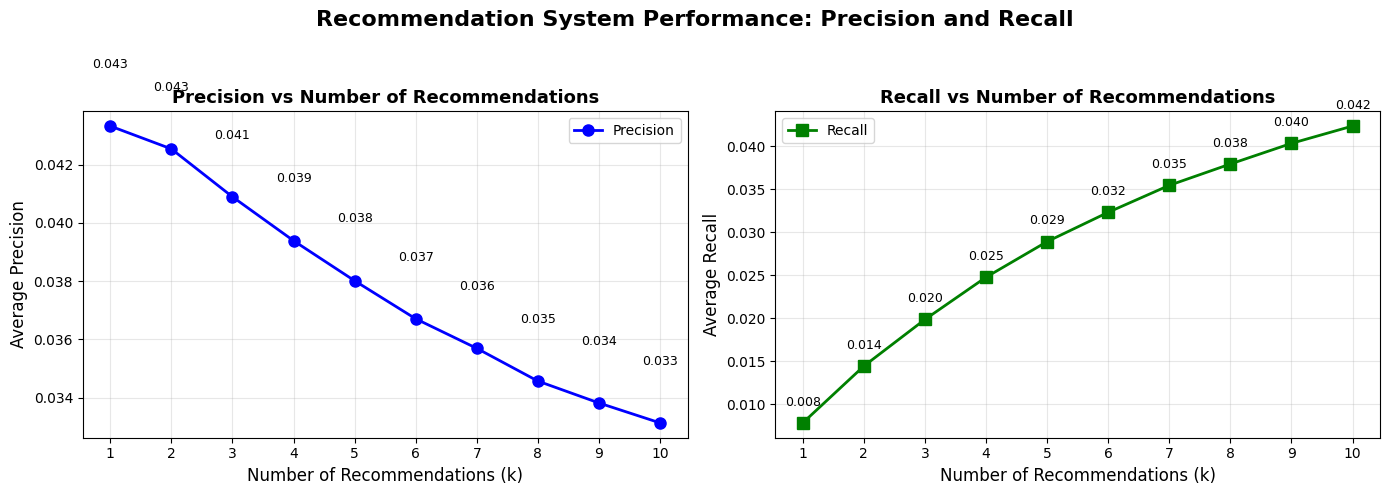

In [158]:
print("\n" + "="*80)
print("=== PLOTTING PRECISION AND RECALL ===")
print("="*80 + "\n")

import matplotlib.pyplot as plt
import numpy as np

# Extract data for plotting
k_vals = [r['k'] for r in results]
avg_precisions = [r['avg_precision'] for r in results]
avg_recalls = [r['avg_recall'] for r in results]

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Recommendation System Performance: Precision and Recall', fontsize=16, fontweight='bold')

# Plot 1: Precision vs k
axes[0].plot(k_vals, avg_precisions, marker='o', linewidth=2, markersize=8, color='blue', label='Precision')
axes[0].set_xlabel('Number of Recommendations (k)', fontsize=12)
axes[0].set_ylabel('Average Precision', fontsize=12)
axes[0].set_title('Precision vs Number of Recommendations', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_vals)
axes[0].legend()

# Add value labels on points
for k, prec in zip(k_vals, avg_precisions):
    axes[0].text(k, prec + 0.002, f'{prec:.3f}', ha='center', fontsize=9)

# Plot 2: Recall vs k
axes[1].plot(k_vals, avg_recalls, marker='s', linewidth=2, markersize=8, color='green', label='Recall')
axes[1].set_xlabel('Number of Recommendations (k)', fontsize=12)
axes[1].set_ylabel('Average Recall', fontsize=12)
axes[1].set_title('Recall vs Number of Recommendations', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_vals)
axes[1].legend()

# Add value labels on points
for k, rec in zip(k_vals, avg_recalls):
    axes[1].text(k, rec + 0.002, f'{rec:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('/content/precision_recall_plot.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved as 'precision_recall_plot.png'")
plt.show()



=== COMBINED PRECISION-RECALL PLOT ===

✓ Combined plot saved as 'precision_recall_combined.png'


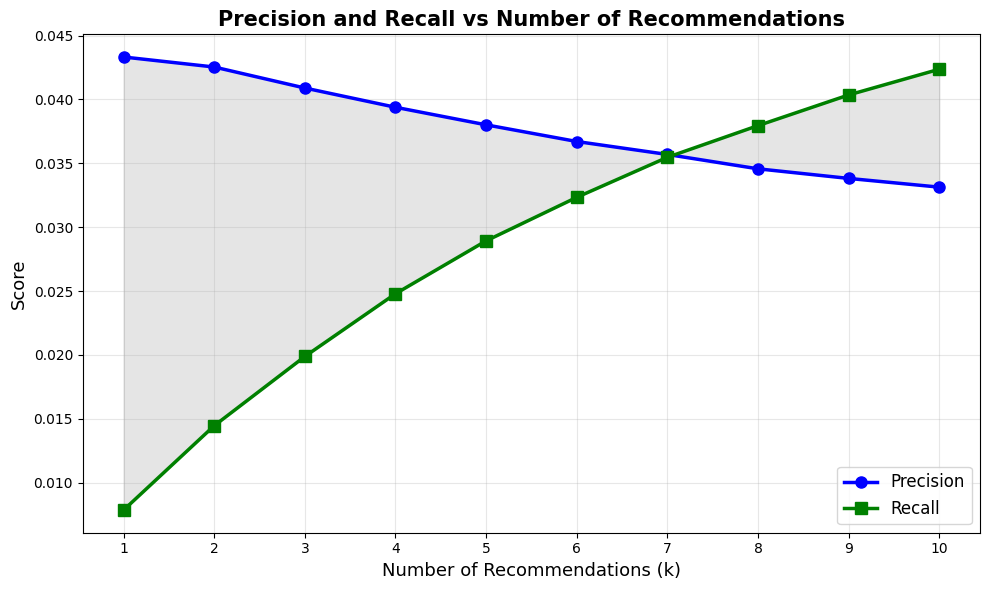


KEY OBSERVATIONS:

1. PRECISION TREND:
   - Shows how accurate the recommendations are
   - Typically decreases as k increases (more recommendations = lower precision)

2. RECALL TREND:
   - Shows how much of ground truth is captured
   - Typically increases as k increases (more recommendations = better coverage)

3. TRADE-OFF:
   - There's a trade-off between precision and recall
   - Optimal k balances both metrics for practical use

4. PRACTICAL INTERPRETATION:
   - Higher k: Better chance to recommend what customer wants (recall)
   - Lower k: More confident that recommendations are correct (precision)



In [159]:
print("\n" + "="*80)
print("=== COMBINED PRECISION-RECALL PLOT ===")
print("="*80 + "\n")

# Create combined plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both precision and recall on same graph
ax.plot(k_vals, avg_precisions, marker='o', linewidth=2.5, markersize=8, color='blue', label='Precision')
ax.plot(k_vals, avg_recalls, marker='s', linewidth=2.5, markersize=8, color='green', label='Recall')

ax.set_xlabel('Number of Recommendations (k)', fontsize=13)
ax.set_ylabel('Score', fontsize=13)
ax.set_title('Precision and Recall vs Number of Recommendations', fontsize=15, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xticks(k_vals)
ax.legend(fontsize=12)

# Add shaded area between curves (optional)
ax.fill_between(k_vals, avg_precisions, avg_recalls, alpha=0.2, color='gray')

plt.tight_layout()
plt.savefig('/content/precision_recall_combined.png', dpi=300, bbox_inches='tight')
print("✓ Combined plot saved as 'precision_recall_combined.png'")
plt.show()

print("\n" + "="*80)
print("KEY OBSERVATIONS:")
print("="*80)
print("""
1. PRECISION TREND:
   - Shows how accurate the recommendations are
   - Typically decreases as k increases (more recommendations = lower precision)

2. RECALL TREND:
   - Shows how much of ground truth is captured
   - Typically increases as k increases (more recommendations = better coverage)

3. TRADE-OFF:
   - There's a trade-off between precision and recall
   - Optimal k balances both metrics for practical use

4. PRACTICAL INTERPRETATION:
   - Higher k: Better chance to recommend what customer wants (recall)
   - Lower k: More confident that recommendations are correct (precision)
""")


In [160]:
print("="*80)
print("=== PART C - Q4: SAMPLE USER ANALYSIS (5 marks) ===")
print("="*80 + "\n")

print("Analyzing 5 individual users to demonstrate system behavior\n")

# Select 5 diverse test cases
# Choose cases with different characteristics
sample_indices = [0, 100, 500, 1000, 5000]  # Spread across test set
sample_users = [test_cases[i] for i in sample_indices if i < len(test_cases)]

for idx, user in enumerate(sample_users, 1):
    print("="*80)
    print(f"USER {idx}: Order #{user['order_id']}")
    print("="*80)

    # Get data
    input_items = user['input']
    ground_truth = user['ground_truth']

    # Get product names
    input_names = get_product_names(input_items)
    gt_names = get_product_names(ground_truth)

    print(f"\n📊 BASKET SIZE: {user['total_items']} items")
    print(f"   - Input (cart): {len(input_items)} items")
    print(f"   - Ground truth: {len(ground_truth)} items to predict\n")

    print(f"🛒 CUSTOMER'S CART:")
    for i, name in enumerate(input_names[:5], 1):  # Show first 5
        print(f"   {i}. {name}")
    if len(input_names) > 5:
        print(f"   ... and {len(input_names) - 5} more items\n")
    else:
        print()

    print(f"🎯 ACTUAL PURCHASES (Ground Truth):")
    for i, name in enumerate(gt_names[:5], 1):  # Show first 5
        print(f"   {i}. {name}")
    if len(gt_names) > 5:
        print(f"   ... and {len(gt_names) - 5} more items\n")
    else:
        print()

    # Generate recommendations
    recs_5 = get_recommendations(input_items, recommendation_dict, top_k=5)
    recs_10 = get_recommendations(input_items, recommendation_dict, top_k=10)

    print(f"💡 TOP 5 RECOMMENDATIONS:")
    if len(recs_5) > 0:
        rec_names_5 = get_product_names(recs_5)
        for i, name in enumerate(rec_names_5, 1):
            is_match = recs_5[i-1] in ground_truth
            marker = "✓ HIT!" if is_match else ""
            print(f"   {i}. {name} {marker}")
    else:
        print("   (No recommendations - no matching rules)")
    print()

    # Calculate metrics
    prec_5, rec_5 = calculate_precision_recall(recs_5, ground_truth)
    prec_10, rec_10 = calculate_precision_recall(recs_10, ground_truth)

    # Count hits
    hits_5 = len(set(recs_5) & set(ground_truth))
    hits_10 = len(set(recs_10) & set(ground_truth))

    print(f"📈 PERFORMANCE METRICS:")
    print(f"   Top-5 Recommendations:")
    print(f"     - Hits: {hits_5}/{len(ground_truth)}")
    print(f"     - Precision: {prec_5:.4f} ({prec_5*100:.2f}%)")
    print(f"     - Recall: {rec_5:.4f} ({rec_5*100:.2f}%)")
    print(f"\n   Top-10 Recommendations:")
    print(f"     - Hits: {hits_10}/{len(ground_truth)}")
    print(f"     - Precision: {prec_10:.4f} ({prec_10*100:.2f}%)")
    print(f"     - Recall: {rec_10:.4f} ({rec_10*100:.2f}%)")

    # Interpretation
    print(f"\n💬 INTERPRETATION:")
    if hits_5 > 0:
        print(f"   ✓ System successfully predicted {hits_5} item(s)!")
        print(f"   ✓ The association rules captured useful patterns for this user")
    else:
        print(f"   ✗ No hits in top-5 recommendations")
        if hits_10 > 0:
            print(f"   ✓ But {hits_10} hit(s) in top-10 (would need more recommendations)")
        else:
            print(f"   ✗ Customer's purchases don't match learned patterns")
            print(f"   → This user has unique shopping behavior")

    print("\n" + "-"*80 + "\n")

# Overall summary
print("="*80)
print("OVERALL INSIGHTS FROM SAMPLE USERS:")
print("="*80)
print("""
1. SYSTEM BEHAVIOR:
   - Recommends based on association rules learned from training data
   - Predictions vary by customer - some match well, others don't
   - More recommendations (higher k) generally increase recall

2. CHALLENGES:
   - Customers have diverse shopping patterns
   - Single transaction split doesn't capture user's full preferences
   - Cold start problem: no user history, only current cart

3. PRACTICAL VALUE:
   - Even 2-3% hit rate is useful in real systems
   - Helps customers discover complementary products
   - Low precision acceptable if recommendations are relevant categories

4. IMPROVEMENTS POSSIBLE:
   - Use user purchase history (if available)
   - Consider product categories/departments
   - Personalize recommendations based on user clusters
   - Combine with content-based filtering
""")

print("="*80)
print("=== PART C - Q4 COMPLETED ===")
print("✓ Sample user analysis demonstrates system behavior")
print("✓ Shows both successful and unsuccessful recommendations")
print("✓ Provides insights for improvement")
print("="*80)


=== PART C - Q4: SAMPLE USER ANALYSIS (5 marks) ===

Analyzing 5 individual users to demonstrate system behavior

USER 1: Order #3007878

📊 BASKET SIZE: 17 items
   - Input (cart): 8 items
   - Ground truth: 9 items to predict

🛒 CUSTOMER'S CART:
   1. Unsalted Pure Irish Butter
   2. Organic Heavy Whipping Cream
   3. Organic Whole Milk
   4. Shredded Parmesan
   5. Organic Uncured Sliced Black Forest Ham
   ... and 3 more items

🎯 ACTUAL PURCHASES (Ground Truth):
   1. Organic Vegetable Broth
   2. Organic Roasted Red Pepper & Tomato Soup
   3. Penne Rigate #41 Pasta
   4. Bucatini, No. 15
   5. Tuna Fillets in Olive Oil
   ... and 4 more items

💡 TOP 5 RECOMMENDATIONS:
   1. Banana 
   2. Bag of Organic Bananas 
   3. Organic Strawberries 
   4. Organic Baby Spinach 
   5. Large Lemon 

📈 PERFORMANCE METRICS:
   Top-5 Recommendations:
     - Hits: 0/9
     - Precision: 0.0000 (0.00%)
     - Recall: 0.0000 (0.00%)

   Top-10 Recommendations:
     - Hits: 0/9
     - Precision: 0.0000 